# Dalitz

Let's try to fit some Dalitz data. To start with it's probably simpler to generate a model with `zfit` itself and fit it back.

## Decay

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the following intermediate resonances:
- $D^0 \to K^0_S \rho(770)$
- $D^0 \to K^{*-}\pi^+$

### Phasespace
At first, we should be able to generate the correct phase-space. 
In this decay, it is defined by the two invariant mass paramenters 

$$
m^2_{12}= m^2(K^0_S\pi^+)\qquad m^2_{13}= m^2(K^0_S\pi^-)
$$

In [1]:
#Import modules
import zfit
import numpy as np

/Users/maurizio/Software/zfit/lib/python3.10/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
import os, sys
sys.path.append(f'{os.environ["PWD"]}/utilities')
from dalitz import DalitzKinematics

In [3]:
# Define Observables
mKS = 0.495
mPi = 0.13957
mDz = 1.864
decay = DalitzKinematics(mDz, [mPi,mKS,mPi])
mp = zfit.Space("mp", limits=(decay.mSqMin([0,1]), decay.mSqMax([0,1])))
mn = zfit.Space("mn", limits=(decay.mSqMin([1,2]), decay.mSqMax([1,2])))

Plot the phase space

In [4]:
import matplotlib.pyplot as plt

/Users/maurizio/Documents/GitRepositories/zift_exercises/utilities/dalitz.py:127: RuntimeWarning: invalid value encountered in sqrt
  Ymin= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)+ np.sqrt(Est3*Est3-m3Sq),2)
/Users/maurizio/Documents/GitRepositories/zift_exercises/utilities/dalitz.py:128: RuntimeWarning: invalid value encountered in sqrt
  Ymax= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)- np.sqrt(Est3*Est3-m3Sq),2)


Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

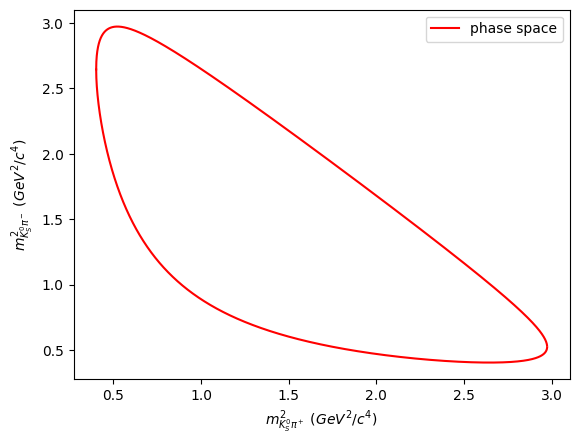

In [5]:
X, Yl, Yh = decay.Contour([0,1],10000)
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

Generate events to fill the phase space

In [6]:
import phasespace
from phasespace import GenParticle

In [7]:
genPip = GenParticle('pi+', mPi)
genPim = GenParticle('pi-', mPi)
genKS  = GenParticle('KS' , mKS)
genDz  = GenParticle('D0' , mDz)
genDz.set_children(genPip,genKS,genPim)
#weights, particles = phasespace.nbody_decay(mDz,[mPi,mKS,mPi]).generate(n_events=1000)
weights, particles = genDz.generate(n_events=1000)

In [8]:
particles

{'pi+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.6147822 ,  0.25776451,  0.18463526,  0.70566965],
        [ 0.46216715,  0.24707463, -0.14753878,  0.56204254],
        [-0.47486303, -0.05909167, -0.08532415,  0.50571407],
        ...,
        [ 0.2976601 ,  0.03623495,  0.04424701,  0.33369461],
        [-0.09944183,  0.09559796, -0.01228539,  0.1966173 ],
        [-0.11100135,  0.38893118,  0.20858231,  0.47599908]])>,
 'KS': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.3222858 , -0.30334947,  0.16003962,  0.68302761],
        [-0.0603582 ,  0.05583164, -0.32488826,  0.59777727],
        [-0.0435732 ,  0.46402462, -0.00404067,  0.67989617],
        ...,
        [ 0.1387459 , -0.35269955, -0.50912857,  0.80491261],
        [ 0.73531499, -0.06171523,  0.32273049,  0.94534485],
        [-0.22977098, -0.30859553,  0.34705691,  0.71658873]])>,
 'pi-': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.2924964 ,  0.04558496, -0.34467488, 

In [9]:
pPiPi = particles['pi+']+particles['pi-']
pKSPip = particles['pi+']+particles['KS']
pKSPim = particles['pi-']+particles['KS']

In [10]:
import tf_kinematics as tfk

In [11]:
tfk.M(pPiPi).numpy()

array([1.08314084, 1.22106811, 1.08851646, 0.50709144, 0.9075428 ,
       1.23306207, 0.37291381, 0.5363257 , 0.481192  , 1.33166734,
       0.73779067, 1.02836144, 0.97810082, 1.13132323, 0.86159418,
       0.7966305 , 1.20950962, 0.85474721, 0.48440343, 1.18538437,
       0.90457259, 0.46071492, 0.93679451, 0.7775148 , 0.98895809,
       0.45665125, 1.11325581, 0.75323449, 0.69537107, 1.28004636,
       0.73815306, 0.85697386, 1.11034757, 0.83491923, 1.17728915,
       1.16608417, 0.93493687, 0.48455154, 0.49108036, 0.92037253,
       0.55860769, 1.24140594, 1.06349296, 0.69900904, 0.84422673,
       0.67488641, 0.59974842, 0.88519348, 0.63470435, 0.49227542,
       0.83513139, 0.63751132, 0.8227415 , 0.90633184, 1.24030354,
       0.72256816, 0.9866784 , 0.32652854, 1.22389104, 0.83238626,
       0.70775279, 0.74054108, 1.06269857, 0.50652639, 0.81598682,
       0.99968064, 0.624225  , 0.52345855, 0.53294179, 0.9667273 ,
       1.14316969, 0.86569924, 0.7624267 , 0.82077013, 1.00726

In [12]:
mSqP = tfk.M2(pKSPip).numpy()
mSqN = tfk.M2(pKSPim).numpy()

Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

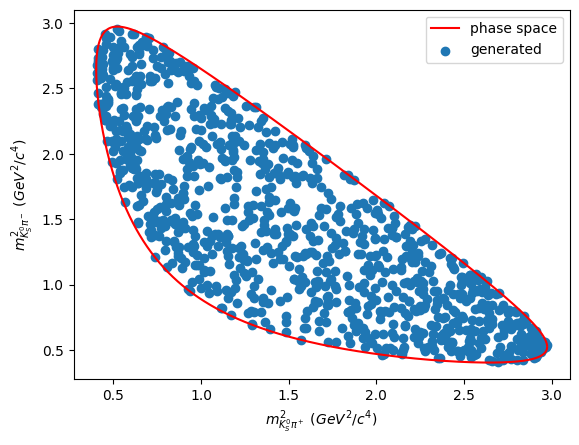

In [15]:
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.scatter(mSqP,mSqN,label='generated')
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

In [16]:
pPiPi

<tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
array([[ 0.3222858 ,  0.30334947, -0.16003962,  1.18097239],
       [ 0.0603582 , -0.05583164,  0.32488826,  1.26622273],
       [ 0.0435732 , -0.46402462,  0.00404067,  1.18410383],
       ...,
       [-0.1387459 ,  0.35269955,  0.50912857,  1.05908739],
       [-0.73531499,  0.06171523, -0.32273049,  0.91865515],
       [ 0.22977098,  0.30859553, -0.34705691,  1.14741127]])>